In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
'''
信用货币周期数据
'''

In [415]:
MacroDataDaily = pd.read_excel('C:/Users/jxjsj/Desktop/宏观经济指标.xlsx').dropna()
MacroDataDaily['M'] = MacroDataDaily['中债国债到期收益率:1年']
MacroDataDaily['C'] = MacroDataDaily['中债企业债到期收益率(AA):3年'] - MacroDataDaily['中债企业债到期收益率(AAA):3年']

In [62]:
MacroDataDaily.columns

Index(['date', '中债国债到期收益率:1年', '中债国债到期收益率:10年', '中债企业债到期收益率(AAA):3年',
       '中债企业债到期收益率(AA):3年', 'M', 'C'],
      dtype='object')

In [416]:
MacroDataMonthly = MacroDataDaily.copy()
MacroDataMonthly['trade_date'] = MacroDataDaily['date']

In [417]:
MacroDataMonthly = MacroDataMonthly.set_index('date').apply(lambda x: x.resample('M').last())

In [418]:
MacroDataMonthly['M'] = MacroDataMonthly['中债国债到期收益率:1年']
MacroDataMonthly['C'] = MacroDataMonthly['中债企业债到期收益率(AA):3年'] - MacroDataMonthly['中债企业债到期收益率(AAA):3年']

In [ ]:
'''
T0 T-1 T-2 T-3评估货币信用周期，月度数据计算货币信用周期，匹配到日度数据上
'''

In [419]:
IndicatorDf = pd.DataFrame(index = MacroDataMonthly.index)
IndicatorDf['trade_date'] = MacroDataMonthly['trade_date']
def Compute4(series):
    status = (series[-1] + series[-2])-(series[-3] + series[-4])
    if status >= 0:
        # 0上行，宽
        return 0
    else:
        # 1下行，紧
        return 1
def Compute3(series):
    status = (series[-1] + series[-2])-(series[-2] + series[-3])
    if status >= 0:
        # 0上行，宽
        return 0
    else:
        # 1下行，紧
        return 1
def Compute2(series):
    status = (series[-1] - series[-2])
    if status >= 0:
        # 0上行，宽
        return 0
    else:
        # 1下行，紧
        return 1
for col in cols:
    IndicatorDf['Delta'+col] = MacroDataMonthly[col].rolling(4).apply(Compute3,raw=True)
IndicatorDf_ = IndicatorDf.dropna().copy()
IndicatorDf_['Cycle'] = IndicatorDf_['DeltaM'].apply(lambda x: str(int(x))) + IndicatorDf_['DeltaC'].apply(lambda x: str(int(x)))

In [420]:
# 0上行，1下行
# 左币右信
ColourDct = {'00':'r','01':'b','10':'y','11':'g'}
IndicatorDf_['Colour'] = IndicatorDf_['Cycle'].apply(lambda x: ColourDct[x])

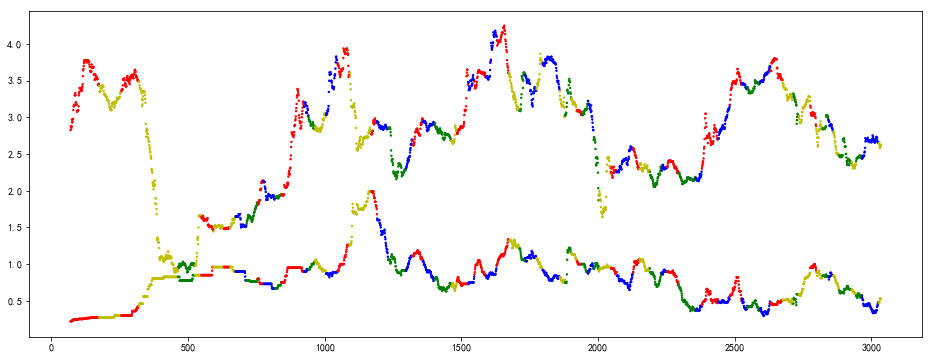

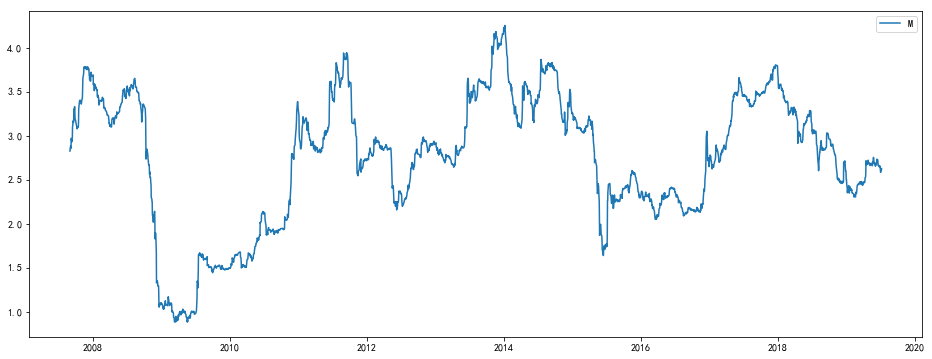

In [421]:
MacroDataDaily_ = (MacroDataDaily.merge(IndicatorDf_[['Colour','trade_date']],left_on='date',right_on='trade_date',how='left')).fillna(method='ffill').dropna()
plt.figure(figsize=(16,6))
plt.scatter(MacroDataDaily_.index,MacroDataDaily_['M'], c = MacroDataDaily_['Colour'].tolist(),s=2)
plt.scatter(MacroDataDaily_.index,MacroDataDaily_['C'], c = MacroDataDaily_['Colour'].tolist(),s=2)
plt.show()

plt.figure(figsize=(16,6))
plt.plot(MacroDataDaily_['date'],MacroDataDaily_['M'],label='M')
plt.legend(loc=0)
plt.show()

In [223]:
'''
四大类金融地产板块
'''

'\n四大类金融地产板块\n'

In [422]:
qs = pd.read_excel('C:/Users/jxjsj/Desktop/券商.xlsx')
yh = pd.read_excel('C:/Users/jxjsj/Desktop/银行.xlsx')
fdc = pd.read_excel('C:/Users/jxjsj/Desktop/房地产.xlsx')
bx = pd.read_excel('C:/Users/jxjsj/Desktop/保险.xlsx')

# 月度数据
# qs['trade_date'] = qs['date']
# qs = qs.set_index('trade_date').apply(lambda x: x.resample('M').last()).reset_index()[['date','close','volume','dealnum','turn']]
# yh['trade_date'] = yh['date']
# yh = yh.set_index('trade_date').apply(lambda x: x.resample('M').last()).reset_index()[['date','close','volume','dealnum','turn']]
# fdc['trade_date'] = fdc['date']
# fdc = fdc.set_index('trade_date').apply(lambda x: x.resample('M').last()).reset_index()[['date','close','volume','dealnum','turn']]
# bx['trade_date'] = bx['date']
# bx = bx.set_index('trade_date').apply(lambda x: x.resample('M').last()).reset_index()[['date','close','volume','dealnum','turn']]

qs['return'] = qs['close']/qs['close'].shift(1)-1
yh['return'] = yh['close']/yh['close'].shift(1)-1
fdc['return'] = fdc['close']/fdc['close'].shift(1)-1
bx['return'] = bx['close']/bx['close'].shift(1)-1

In [ ]:
'''
四板块周期表现分析 - 日or月
'''

In [423]:
qs['class'] = '券商'
yh['class'] = '银行'
fdc['class'] = '房地产'
bx['class'] = '保险'

In [424]:
start = '2007-12-01'
end = '2019-06-30'

In [425]:
FinDataDf = pd.concat([qs,yh,fdc,bx],axis=0)
FinDataDf = FinDataDf[(FinDataDf['date']<=end) & (FinDataDf['date']>=start)]

In [426]:
FinDataDf_ = FinDataDf.merge(MacroDataDaily_[['date','Colour']],how='left')

In [427]:
ClassList = ['券商','银行','房地产','保险']
CycleDct = {'r':'紧币紧信','b':'紧币宽信','y':'宽币紧信','g':'宽币宽信'}

券商 紧币紧信 Y-MeanReturnDaily:-0.3013
券商 紧币紧信 MaxDrawDown:0.7775
券商 紧币紧信 CumReturn:-0.6913

券商 紧币宽信 Y-MeanReturnDaily:0.3059
券商 紧币宽信 MaxDrawDown:0.3296
券商 紧币宽信 CumReturn:0.9848

券商 宽币紧信 Y-MeanReturnDaily:0.0117
券商 宽币紧信 MaxDrawDown:0.7370
券商 宽币紧信 CumReturn:-0.3031

券商 宽币宽信 Y-MeanReturnDaily:0.2213
券商 宽币宽信 MaxDrawDown:0.4625
券商 宽币宽信 CumReturn:0.4273



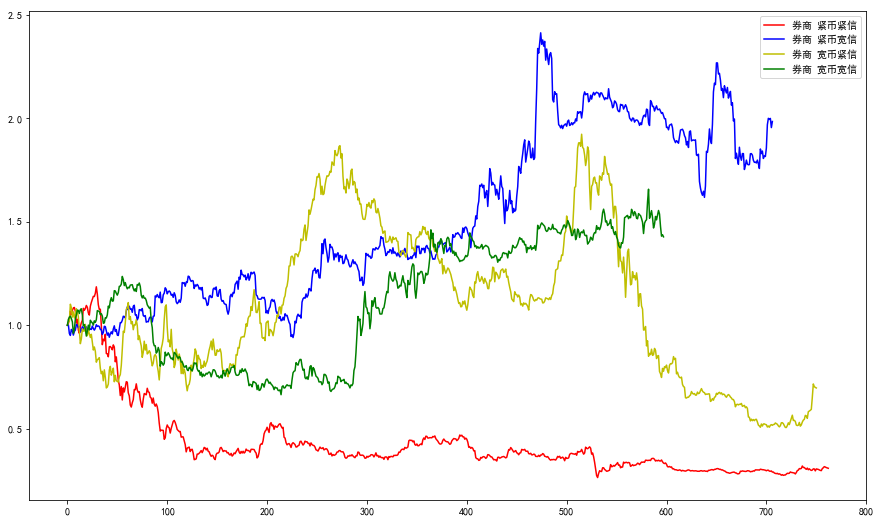

银行 紧币紧信 Y-MeanReturnDaily:-0.1539
银行 紧币紧信 MaxDrawDown:0.6660
银行 紧币紧信 CumReturn:-0.4456

银行 紧币宽信 Y-MeanReturnDaily:0.1724
银行 紧币宽信 MaxDrawDown:0.2107
银行 紧币宽信 CumReturn:0.5356

银行 宽币紧信 Y-MeanReturnDaily:-0.1094
银行 宽币紧信 MaxDrawDown:0.5543
银行 宽币紧信 CumReturn:-0.4187

银行 宽币宽信 Y-MeanReturnDaily:0.3307
银行 宽币宽信 MaxDrawDown:0.2542
银行 宽币宽信 CumReturn:1.0049



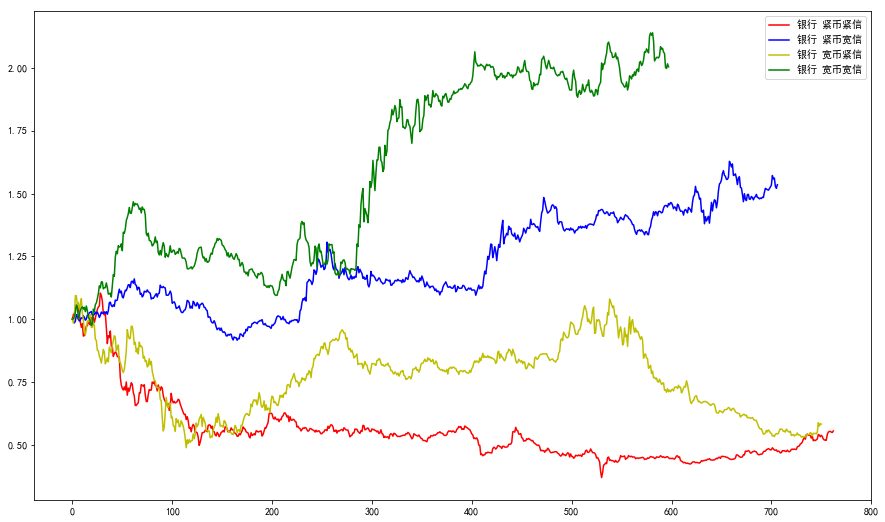

房地产 紧币紧信 Y-MeanReturnDaily:-0.2051
房地产 紧币紧信 MaxDrawDown:0.7158
房地产 紧币紧信 CumReturn:-0.5595

房地产 紧币宽信 Y-MeanReturnDaily:0.2796
房地产 紧币宽信 MaxDrawDown:0.2053
房地产 紧币宽信 CumReturn:0.9992

房地产 宽币紧信 Y-MeanReturnDaily:-0.0684
房地产 宽币紧信 MaxDrawDown:0.6359
房地产 宽币紧信 CumReturn:-0.3718

房地产 宽币宽信 Y-MeanReturnDaily:0.2559
房地产 宽币宽信 MaxDrawDown:0.4051
房地产 宽币宽信 CumReturn:0.6514



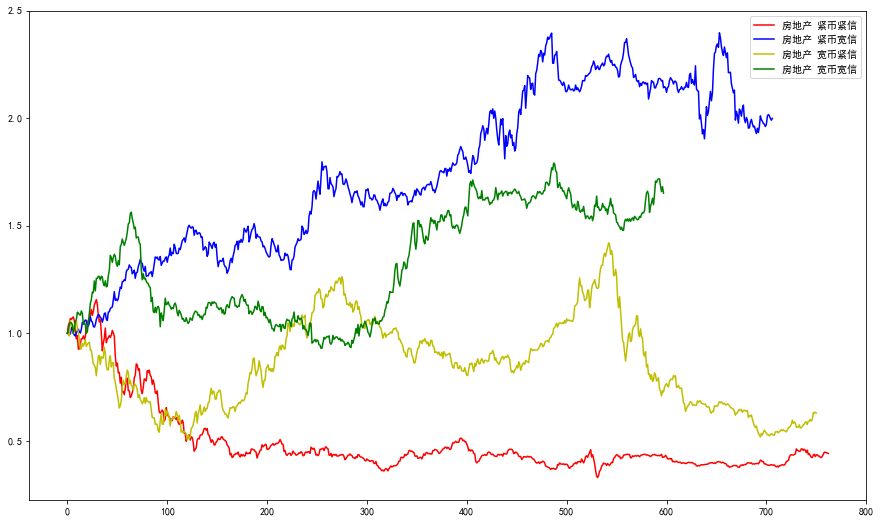

保险 紧币紧信 Y-MeanReturnDaily:-0.2089
保险 紧币紧信 MaxDrawDown:0.7689
保险 紧币紧信 CumReturn:-0.5665

保险 紧币宽信 Y-MeanReturnDaily:0.2983
保险 紧币宽信 MaxDrawDown:0.2891
保险 紧币宽信 CumReturn:1.0781

保险 宽币紧信 Y-MeanReturnDaily:-0.0384
保险 宽币紧信 MaxDrawDown:0.6538
保险 宽币紧信 CumReturn:-0.3464

保险 宽币宽信 Y-MeanReturnDaily:0.3500
保险 宽币宽信 MaxDrawDown:0.2199
保险 宽币宽信 CumReturn:1.0134



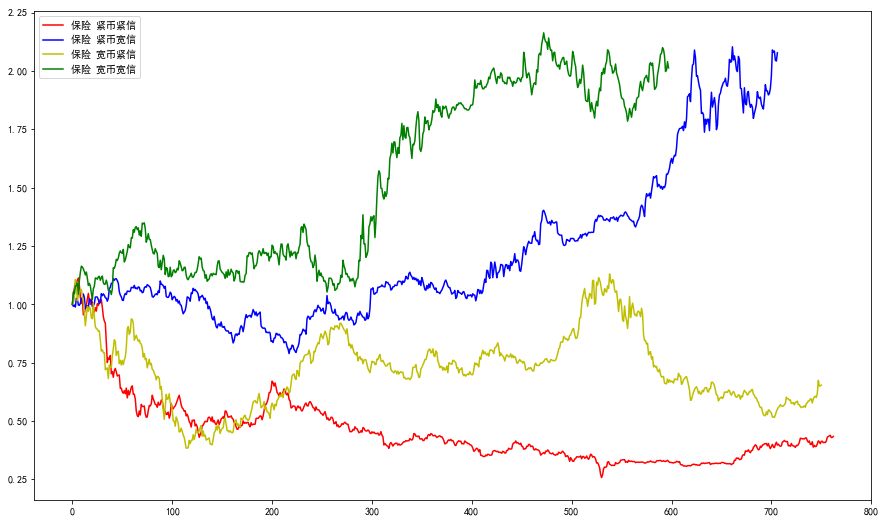

In [428]:
for Class in ClassList:
    FinDataDf_sub0 = FinDataDf_[FinDataDf_['class'] == Class]
    plt.figure(figsize=(15,9))
    for colour in ['r','b','y','g']:
        label = Class+' '+CycleDct[colour]
        FinDataDf_sub1 = FinDataDf_sub0[FinDataDf_sub0['Colour'] == colour]
        ClassColour = FinDataDf_sub1['return']
        ClassColourList =  [1]+ClassColour.apply(lambda x: 1+x).cumprod().tolist()
        ClassColourDf = pd.DataFrame(ClassColourList,columns=['equity'])
        
        # 指标计算
        MaxDrawDown = (1-ClassColourDf['equity']/ClassColourDf['equity'].expanding().max()).max()
        
        print(label+' Y-MeanReturnDaily:%.4f' %(ClassColour.mean()*252))
        print(label+' MaxDrawDown:%.4f' %(MaxDrawDown))
        print(label+' CumReturn:%.4f\n' %(ClassColourList[-1]/ClassColourList[0]-1))
        plt.plot(ClassColourList,label=label,c=colour)
    plt.legend(loc=0)
    plt.show()

In [ ]:
'''
四板块原始净值序列
'''

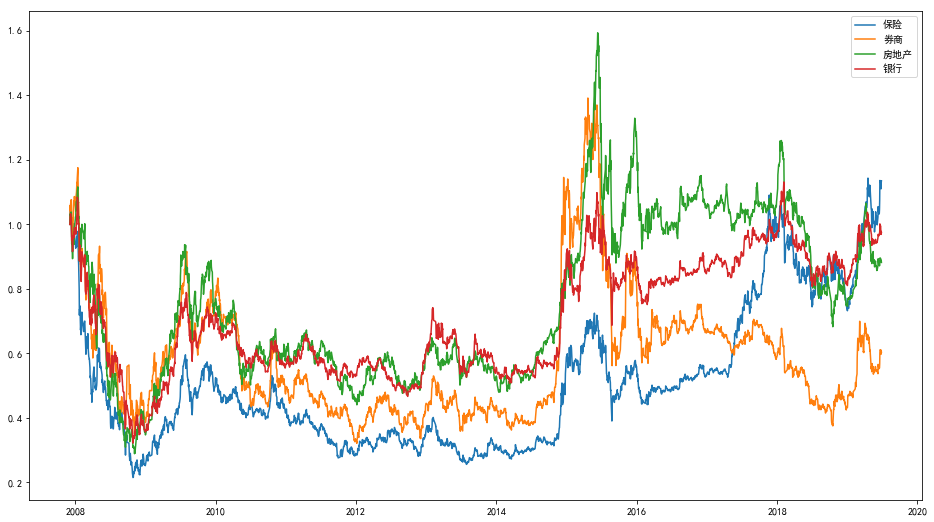

In [429]:
FinDataCloseDf = FinDataDf.pivot(index='date',columns='class',values='close')
for col in ['保险','券商','房地产','银行']:
    FinDataCloseDf[col] = FinDataCloseDf[col]/FinDataCloseDf[col].tolist()[0]
    
plt.figure(figsize=(16,9))
for col in ['保险','券商','房地产','银行']:
    plt.plot(FinDataCloseDf.index,FinDataCloseDf[col].tolist(),label=col)
plt.legend(loc=0)
plt.show()

In [ ]:
'''
四板块收益率滚动相关系数
'''

In [430]:
FinDataReturnDf = FinDataDf.pivot(index='date',columns='class',values='return')
FinDataReturnCorDf = pd.DataFrame(index=FinDataReturnDf.index)
CorList = ['券商银行','银行房地产','保险房地产','保险银行','券商房地产','保险券商']
CorMat = FinDataReturnDf.rolling(126).corr().reset_index()
CorMat
for Cor in CorList:
    subCor = CorMat[[Cor[:2],'class','date']]
    subCor_ = subCor[subCor['class']==Cor[2:]].set_index('date')
    FinDataReturnCorDf[Cor] = subCor_[Cor[:2]]

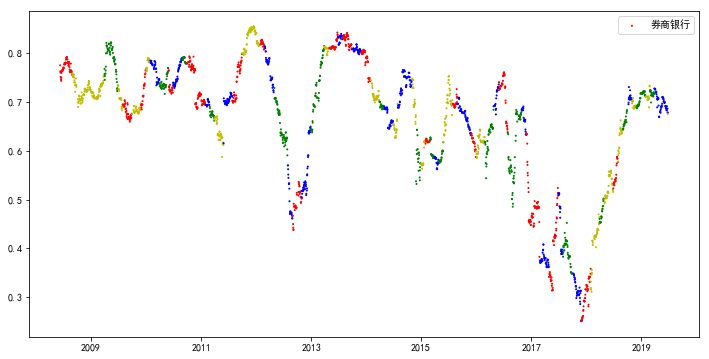

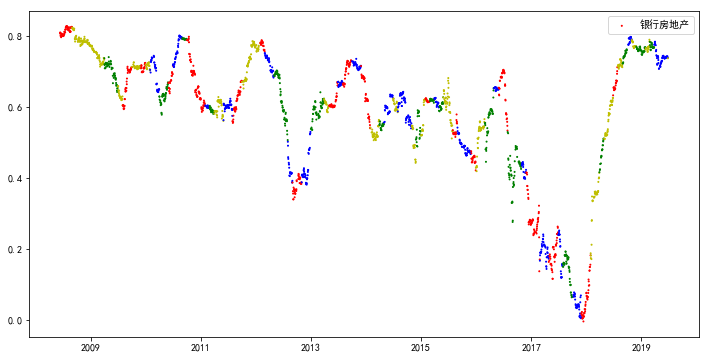

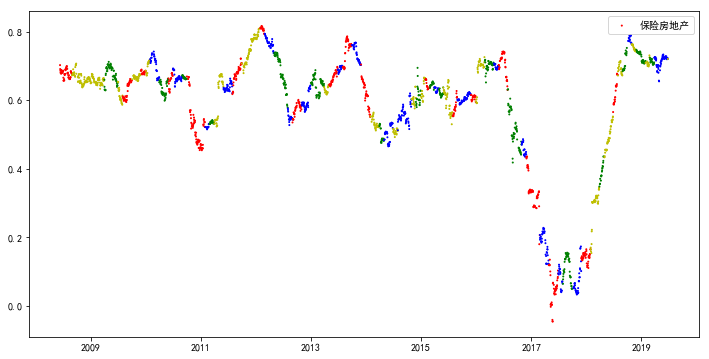

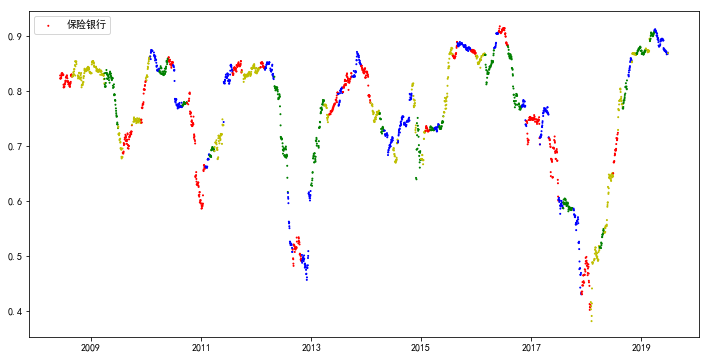

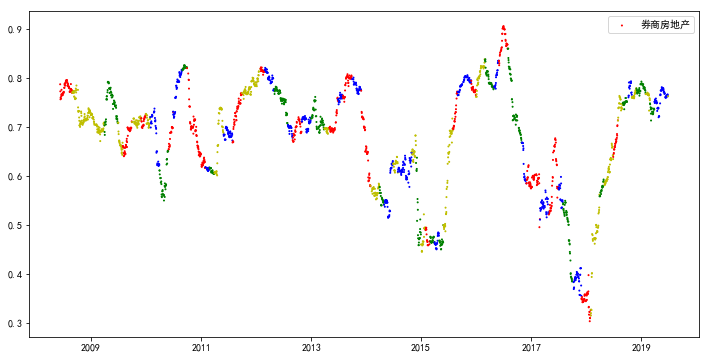

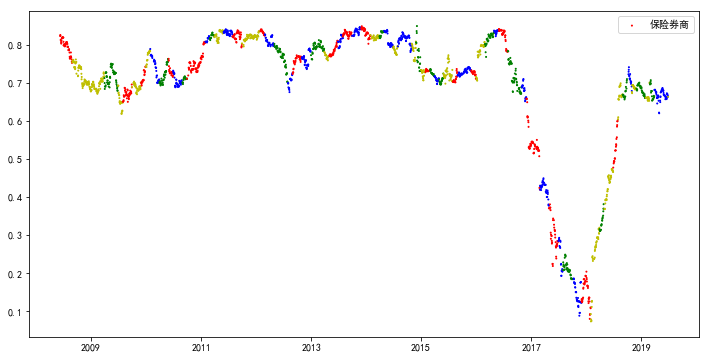

In [431]:
FinDataReturnCorDf_ = FinDataReturnCorDf.merge(MacroDataDaily_[['date','Colour']],how='left',left_index=True,right_on='date')
for Cor in CorList:
    plt.figure(figsize=(12,6))
    plt.scatter(FinDataReturnCorDf_['date'].tolist(),FinDataReturnCorDf_[Cor].tolist(),label=Cor,c=FinDataReturnCorDf_['Colour'].tolist(),s=1)
    plt.legend(loc=0)
    plt.show()

In [ ]:
'''
基准-中证金融地产指数
'''

In [432]:
zzjrdc = pd.read_excel('C:/Users/jxjsj/Desktop/中证金融地产.xlsx')
zzjrdc['return'] = zzjrdc['close']/zzjrdc['close'].shift(1)-1
zzjrdc['class'] =  '中证金融地产指数'
zzjrdc_ = zzjrdc[(zzjrdc['date']<=end) & (zzjrdc['date']>=start)].copy()
zzjrdc_ = zzjrdc_.merge(MacroDataDaily_[['date','Colour']],how='left')

中证金融地产指数 紧币紧信 Y-MeanReturnDaily:-0.0128
中证金融地产指数 紧币紧信 MaxDrawDown:0.7032
中证金融地产指数 紧币紧信 CumReturn:-0.5344

中证金融地产指数 紧币宽信 Y-MeanReturnDaily:0.0151
中证金融地产指数 紧币宽信 MaxDrawDown:0.1564
中证金融地产指数 紧币宽信 CumReturn:0.8319

中证金融地产指数 宽币紧信 Y-MeanReturnDaily:-0.0069
中证金融地产指数 宽币紧信 MaxDrawDown:0.5848
中证金融地产指数 宽币紧信 CumReturn:-0.4238

中证金融地产指数 宽币宽信 Y-MeanReturnDaily:0.0180
中证金融地产指数 宽币宽信 MaxDrawDown:0.3031
中证金融地产指数 宽币宽信 CumReturn:0.8051



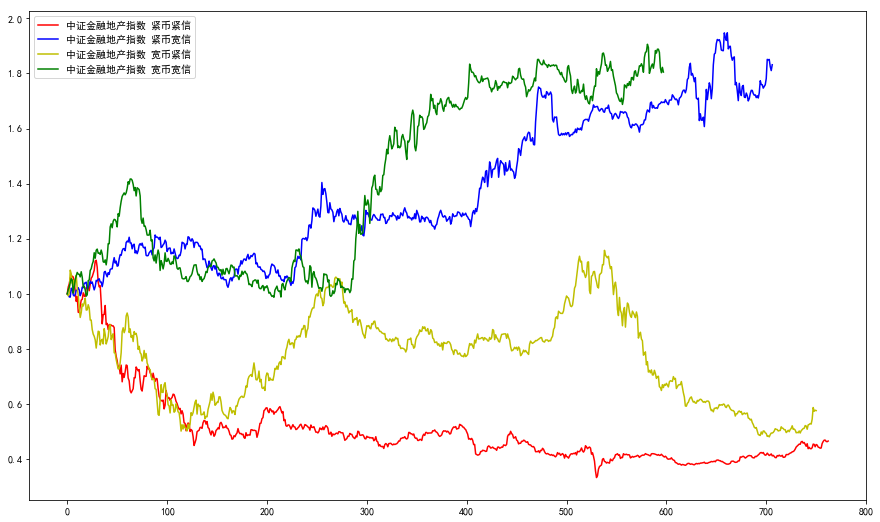

In [433]:
plt.figure(figsize=(15,9))
for colour in ['r','b','y','g']:
    label = '中证金融地产指数'+' '+CycleDct[colour]
    zzjrdc__sub1 = zzjrdc_[zzjrdc_['Colour'] == colour]
    ClassColour = zzjrdc__sub1['return']
    ClassColourList =  [1]+ClassColour.apply(lambda x: 1+x).cumprod().tolist()
    ClassColourDf = pd.DataFrame(ClassColourList,columns=['equity'])

    # 指标计算
    MaxDrawDown = (1-ClassColourDf['equity']/ClassColourDf['equity'].expanding().max()).max()

    print(label+' Y-MeanReturnDaily:%.4f' %(ClassColour.mean()*np.sqrt(252)))
    print(label+' MaxDrawDown:%.4f' %(MaxDrawDown))
    print(label+' CumReturn:%.4f\n' %(ClassColourList[-1]/ClassColourList[0]-1))
    plt.plot(ClassColourList,label=label,c=colour)
plt.legend(loc=0)
plt.show()

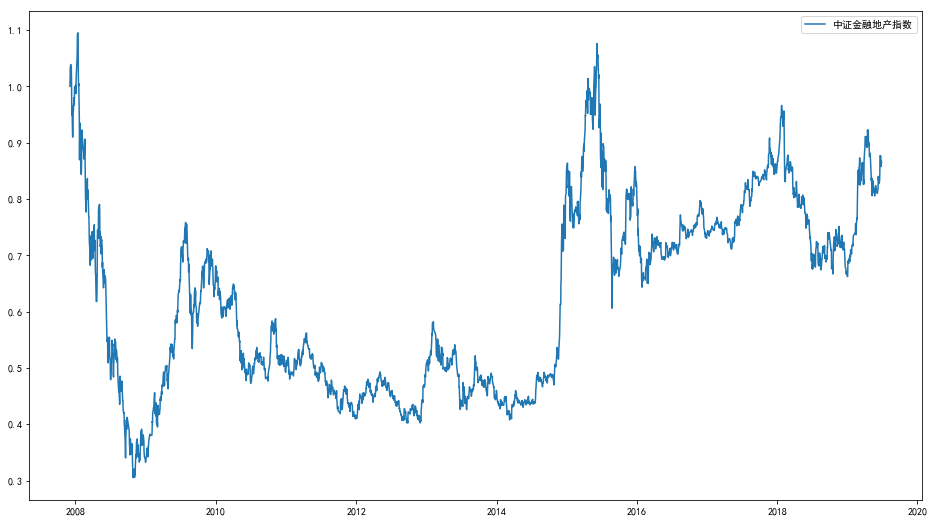

In [434]:
col = '中证金融地产指数'

MarkDataCloseDf = zzjrdc_.pivot(index='date',columns='class',values='close')
MarkDataCloseDf[col] = MarkDataCloseDf[col]/MarkDataCloseDf[col].tolist()[0]

plt.figure(figsize=(16,9))
plt.plot(MarkDataCloseDf.index,MarkDataCloseDf[col].tolist(),label=col)
plt.legend(loc=0)
plt.show()

In [ ]:
'''
基准-工银瑞信金融地产
'''

In [435]:
gyrxjrdc = pd.read_excel('C:/Users/jxjsj/Desktop/工银瑞信金融地产.xlsx').dropna()
gyrxjrdc['return'] = gyrxjrdc['close']/gyrxjrdc['close'].shift(1)-1
gyrxjrdc['class'] =  '工银瑞信金融地产'
gyrxjrdc_ = gyrxjrdc[(gyrxjrdc['date']<=end) & (gyrxjrdc['date']>=start)].copy()
gyrxjrdc_ = gyrxjrdc_.merge(MacroDataDaily_[['date','Colour']],how='left')

工银瑞信金融地产 紧币紧信 Y-MeanReturnDaily:0.0085
工银瑞信金融地产 紧币紧信 MaxDrawDown:0.2314
工银瑞信金融地产 紧币紧信 CumReturn:0.1456

工银瑞信金融地产 紧币宽信 Y-MeanReturnDaily:0.0197
工银瑞信金融地产 紧币宽信 MaxDrawDown:0.1593
工银瑞信金融地产 紧币宽信 CumReturn:0.6551

工银瑞信金融地产 宽币紧信 Y-MeanReturnDaily:-0.0061
工银瑞信金融地产 宽币紧信 MaxDrawDown:0.5601
工银瑞信金融地产 宽币紧信 CumReturn:-0.1731

工银瑞信金融地产 宽币宽信 Y-MeanReturnDaily:0.0235
工银瑞信金融地产 宽币宽信 MaxDrawDown:0.1754
工银瑞信金融地产 宽币宽信 CumReturn:0.5728



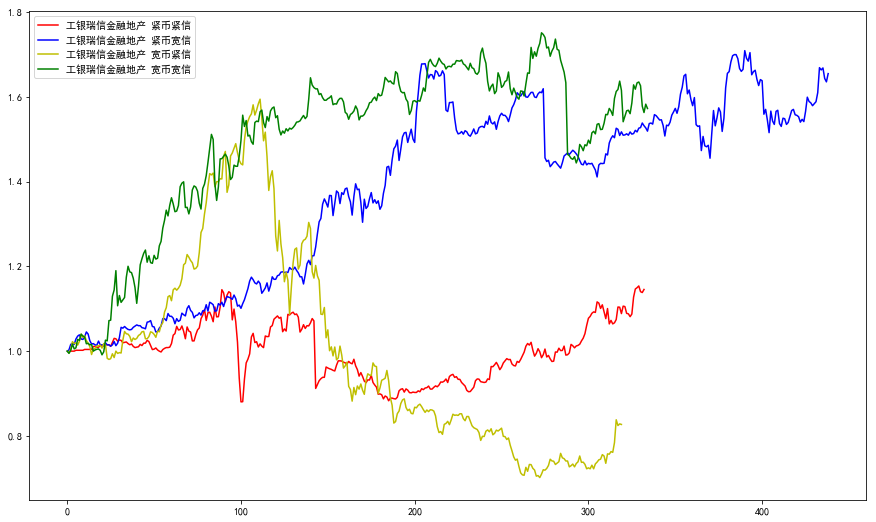

In [436]:
plt.figure(figsize=(15,9))
for colour in ['r','b','y','g']:
    label = '工银瑞信金融地产'+' '+CycleDct[colour]
    gyrxjrdc__sub1 = gyrxjrdc_[gyrxjrdc_['Colour'] == colour]
    ClassColour = gyrxjrdc__sub1['return']
    ClassColourList =  [1]+ClassColour.apply(lambda x: 1+x).cumprod().tolist()
    ClassColourDf = pd.DataFrame(ClassColourList,columns=['equity'])

    # 指标计算
    MaxDrawDown = (1-ClassColourDf['equity']/ClassColourDf['equity'].expanding().max()).max()

    print(label+' Y-MeanReturnDaily:%.4f' %(ClassColour.mean()*np.sqrt(252)))
    print(label+' MaxDrawDown:%.4f' %(MaxDrawDown))
    print(label+' CumReturn:%.4f\n' %(ClassColourList[-1]/ClassColourList[0]-1))
    plt.plot(ClassColourList,label=label,c=colour)
plt.legend(loc=0)
plt.show()

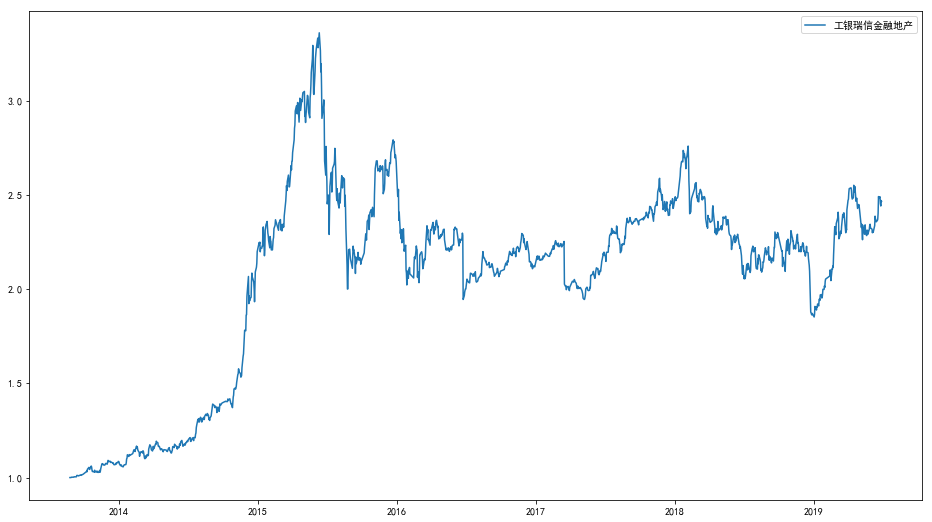

In [437]:
col = '工银瑞信金融地产'

MarkDataCloseDf = gyrxjrdc_.pivot(index='date',columns='class',values='close')
MarkDataCloseDf[col] = MarkDataCloseDf[col]/MarkDataCloseDf[col].tolist()[0]

plt.figure(figsize=(16,9))
plt.plot(MarkDataCloseDf.index,MarkDataCloseDf[col].tolist(),label=col)
plt.legend(loc=0)
plt.show()

In [ ]:
'''
历史每个周期下，板块月收益率排名
'''

In [438]:
FinDataDf_tmp = FinDataDf_.copy()
FinDataDf_tmp['trade_date'] = FinDataDf_tmp['date']
FinDataDf_Rank = FinDataDf_tmp.set_index('date').groupby('class').apply(lambda x: x.resample('M').last())
FinDataDf_Rank.index = FinDataDf_Rank.index.droplevel(0)

In [439]:
def ComputeReturn(df):
    df['return'] = df['close']/df['close'].shift(1)-1
    return df
FinDataDf_Rank = FinDataDf_Rank.groupby('class').apply(ComputeReturn)

In [440]:
# 周期绝对排名
AvgMonthReturnSaveDict = {}
for c in ['y','r','b','g']:
    FinDataDf_Rank_sub0 = FinDataDf_Rank[FinDataDf_Rank['Colour'] == c]
#     print(CycleDct[c])
    AvgMonthReturnSaveList = []
    for Class in ['保险','券商','房地产','银行']:
        FinDataDf_Rank_sub1 = FinDataDf_Rank_sub0[FinDataDf_Rank_sub0['class']==Class]
        AvgMonthReturn = FinDataDf_Rank_sub1['return'].mean()
#         print(Class+' 平均月收益率 %.4f' %(AvgMonthReturn))
        AvgMonthReturnSaveList.append(AvgMonthReturn)
    AvgMonthReturnSaveDict[CycleDct[c]] = AvgMonthReturnSaveList
AvgMonthReturnSaveDf = pd.DataFrame(AvgMonthReturnSaveDict)
AvgMonthReturnSaveDf.index = ['保险','券商','房地产','银行']
AvgMonthReturnSaveDf

,宽币紧信,紧币紧信,紧币宽信,宽币宽信
保险,0.006658,-0.010800,0.003335,0.034250
券商,0.003223,-0.019644,-0.009450,0.053614
房地产,-0.006354,-0.021267,0.012286,0.036969
银行,0.012517,-0.021037,-0.003063,0.027747


In [441]:
AvgMonthReturnSaveDf.sort_values('宽币宽信')

,宽币紧信,紧币紧信,紧币宽信,宽币宽信
银行,0.012517,-0.021037,-0.003063,0.027747
保险,0.006658,-0.010800,0.003335,0.034250
房地产,-0.006354,-0.021267,0.012286,0.036969
券商,0.003223,-0.019644,-0.009450,0.053614


In [442]:
# 总排名
AvgMonthReturnTolSaveDict = {}
AvgMonthReturnTolSaveList = []
for Class in ['保险','券商','房地产','银行']:
    FinDataDf_Rank_sub2 = FinDataDf_Rank[FinDataDf_Rank['class']==Class]
    AvgMonthReturnTol = FinDataDf_Rank_sub2['return'].mean()
#     print(Class+' 平均月收益率 %.4f' %(AvgMonthReturnTol))
    AvgMonthReturnTolSaveList.append(AvgMonthReturnTol)
AvgMonthReturnTolSaveDict['全周期'] = AvgMonthReturnTolSaveList
AvgMonthReturnTolSaveDf = pd.DataFrame(AvgMonthReturnTolSaveDict)
AvgMonthReturnTolSaveDf.index = ['保险','券商','房地产','银行']
AvgMonthReturnTolSaveDf

,全周期
保险,0.007410
券商,0.005256
房地产,0.003874
银行,0.003479


In [ ]:
'''
聚类
'''

In [65]:
# cols = ['中债国债到期收益率:1年', '中债国债到期收益率:10年', '中债企业债到期收益率(AAA):3年',
#        '中债企业债到期收益率(AA):3年']
cols = ['M','C']

In [125]:
IndicatorDf = pd.DataFrame(index = MacroDataMonthly.index)
IndicatorDf['trade_date'] = MacroDataMonthly['trade_date']
def Compute2(series):
    return series[-1] - series[-2]
def Compute3(series):
    return series[-2] - series[-3]
def Compute4(series):
    return series[-3] - series[-4]
for col in cols:
    IndicatorDf['0'+col] = MacroDataMonthly[col].rolling(2).apply(Compute2,raw=True)
    IndicatorDf['1'+col] = MacroDataMonthly[col].rolling(3).apply(Compute3,raw=True)
    IndicatorDf['2'+col] = MacroDataMonthly[col].rolling(4).apply(Compute4,raw=True)

In [126]:
IndicatorDf_ = IndicatorDf.dropna().copy()

In [127]:
IndicatorDf_.columns

Index(['trade_date', '0M', '1M', '2M', '0C', '1C', '2C'], dtype='object')

In [128]:
from sklearn.cluster import KMeans
CycleCluster = KMeans( n_clusters=4, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=None, 
                     algorithm='auto')
X = IndicatorDf_[['0M', '1M', '2M', '0C', '1C', '2C']].copy()
CycleCluster.fit(X)
CycleClusterResult = CycleCluster.labels_

In [129]:
IndicatorDf_['Cycle'] = CycleClusterResult
IndicatorDf_ = IndicatorDf_.merge(MacroDataMonthly[['M','C']],left_on='date',right_index=True,how='left')
ColourDct = {0:'r',1:'b',2:'y',3:'g'}
IndicatorDf_['Colour'] = IndicatorDf_['Cycle'].apply(lambda x: ColourDct[x])

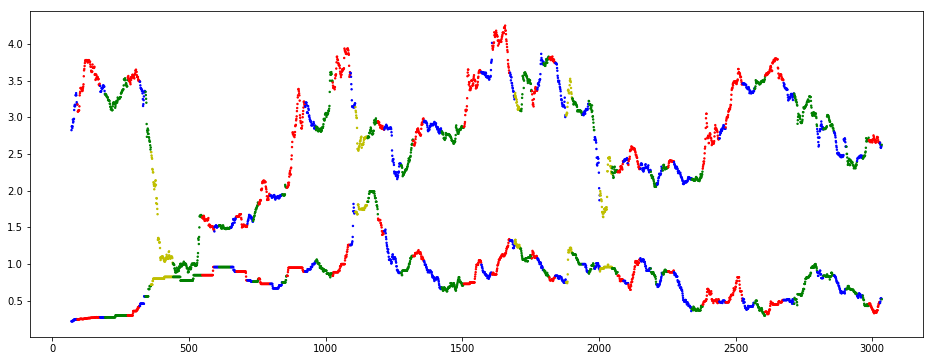

In [131]:
MacroDataDaily_ = (MacroDataDaily.merge(IndicatorDf_[['Colour','trade_date']],left_on='date',right_on='trade_date',how='left')).fillna(method='ffill').dropna()

plt.figure(figsize=(16,6))
ColourDct = {0:'r',1:'b',2:'y',3:'g'}
plt.scatter(MacroDataDaily_.index,MacroDataDaily_['M'], c = MacroDataDaily_['Colour'].tolist(),s=2)
plt.scatter(MacroDataDaily_.index,MacroDataDaily_['C'], c = MacroDataDaily_['Colour'].tolist(),s=2)
plt.show()